In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
bins = []
histo = []
with open('sori.xvg', "r+") as f:
    for line in f:
        if line[0] == '@' or line[0] == '#' or line[0] == '&':
            pass
        else:
            dummy = line.split()
            bins.append(float(dummy[0]))
            histo.append(float(dummy[1]))
bins = np.array(bins)
histo = np.array(histo)
print(bins)
print('\n')
print(histo)

[-0.99       -0.97       -0.95       -0.93       -0.91       -0.89
 -0.87       -0.85       -0.83       -0.81       -0.79       -0.77
 -0.75       -0.73       -0.71       -0.69       -0.67       -0.65
 -0.63       -0.61       -0.59       -0.57       -0.55       -0.53
 -0.51       -0.49       -0.47       -0.45       -0.43       -0.41
 -0.39       -0.37       -0.35       -0.33       -0.31       -0.29
 -0.27       -0.25       -0.23       -0.21       -0.19       -0.17
 -0.15       -0.13       -0.11       -0.09       -0.07       -0.05
 -0.03       -0.01        0.00999998  0.03        0.05        0.07
  0.09        0.11        0.13        0.15        0.17        0.19
  0.21        0.23        0.25        0.27        0.29        0.31
  0.33        0.35        0.37        0.39        0.41        0.43
  0.45        0.47        0.49        0.51        0.53        0.55
  0.57        0.59        0.61        0.63        0.65        0.67
  0.69        0.71        0.73        0.75        0.77        

In [13]:
#Convert bins from cos(\theta) to \theta
#Leave off the last one because 1) there is no probability of observing the 
#system there (the value of the histogram for that bin is 0) and 
#2) arccos(1.01) is not defined (out of the domain of the arccos function/ range of the cosine function)
theta_bins = np.arccos(bins[:-1])

theta_bins = np.append(theta_bins,0)
theta_bins = np.append(np.pi,theta_bins); print(theta_bins); print(theta_bins.shape)

[3.14159265 3.00005318 2.89602714 2.82403222 2.76520917 2.71408039
 2.6681415  2.62599865 2.58678162 2.54990401 2.51494844 2.48160532
 2.44963748 2.41885841 2.38911828 2.36029454 2.33228538 2.30500511
 2.27838076 2.25234954 2.22685692 2.20185517 2.17730218 2.15316056
 2.12939689 2.10598112 2.08288608 2.0600871  2.03756167 2.0152891
 1.99325039 1.97142792 1.94980535 1.92836743 1.9070999  1.88598936
 1.86502316 1.84418936 1.82347658 1.80287401 1.78237129 1.76195847
 1.741626   1.7213646  1.70116531 1.68101938 1.66091827 1.64085362
 1.62081718 1.60080083 1.58079649 1.56079618 1.54079182 1.52077547
 1.50073903 1.48067438 1.46057328 1.44042735 1.42022805 1.39996666
 1.37963418 1.35922137 1.33871864 1.31811607 1.2974033  1.27656949
 1.25560329 1.23449275 1.21322522 1.19178731 1.17016473 1.14834226
 1.12630355 1.10403099 1.08150555 1.05870657 1.03561154 1.01219576
 0.98843209 0.96429047 0.93973749 0.91473574 0.88924312 0.86321189
 0.83658754 0.80930727 0.78129812 0.75247438 0.72273425 0.69195

In [20]:
#Use the bin widths, histogram, and theta values defined by each bin to get the average value of theta.
avg_theta = 0
thetas = (theta_bins[1:] + theta_bins[:-1]) / 2
dtheta = theta_bins[:-1] - theta_bins[1:]

#Renormalize the histogram
histo = histo / (histo.sum()*dtheta)

In [26]:
for i, ptheta in enumerate(histo):
    avg_theta += ptheta*dtheta[i]*thetas[i]

In [29]:
print(np.cos(avg_theta))

-0.2183271459517546


In [30]:
#Check this value of <cos(theta)> between r = 0.3 nm and r = 0.5 nm
r = []
data = []
with open('sord_P.xvg',"r+") as f:
    for line in f:
        if line[0] == '@' or line[0] == '#' or line[0] == '&':
            pass
        else:
            dummy = line.split()
            r.append(float(dummy[0]))
            data.append(float(dummy[1]))
r = np.array(r)
data = np.array(data)

In [35]:
counter = 0
dummy = 0
for i, radius in enumerate(r):
    if radius >= 0.3 and radius <= 0.5:
        dummy += data[i]
        counter += 1
print(dummy / counter)

-0.41557171000000004


In [76]:
avg_theta_traj = []

for i in range(15):
    bins = []
    histo = []
    with open('sori'+str(i)+'.xvg', "r+") as f:
        for line in f:
            if line[0] == '@' or line[0] == '#' or line[0] == '&':
                pass
            else:
                dummy = line.split()
                bins.append(float(dummy[0]))
                histo.append(float(dummy[1]))
    bins = np.array(bins)
    histo = np.array(histo)
    #print(bins)
    #print('\n')
    #print(histo)
    
    #Convert bins from cos(\theta) to \theta
    #Leave off the last one because 1) there is no probability of observing the 
    #system there (the value of the histogram for that bin is 0) and 
    #2) arccos(1.01) is not defined (out of the domain of the arccos function/ range of the cosine function)
    theta_bins = np.arccos(bins[:-1])

    theta_bins = np.append(theta_bins,0)
    theta_bins = np.append(np.pi,theta_bins); #print(theta_bins); print(theta_bins.shape)
    
    #Use the bin widths, histogram, and theta values defined by each bin to get the average value of theta.
    avg_theta = 0
    thetas = (theta_bins[1:] + theta_bins[:-1]) / 2
    dtheta = theta_bins[:-1] - theta_bins[1:]

    #Renormalize the histogram
    histo = histo / (histo.sum()*dtheta)
    
    for j, ptheta in enumerate(histo):
        avg_theta += ptheta*dtheta[j]*thetas[j]
        
    print(np.cos(avg_theta))
    avg_theta_traj.append(np.cos(avg_theta))
avg_theta_traj = np.array(avg_theta_traj)

nan
nan
-0.7528436814142675
-0.6296520536996046
-0.2796097333859734
-0.14571140374384683
-0.19311366044876452
-0.08641801756394983
-0.0934516999089363
-0.0713934058064514
-0.06480510038141182
-0.0547937727343024
-0.040137537297541624
-0.037477556096596074
-0.033225502622874395


In [78]:
r_hat = np.array([0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45])

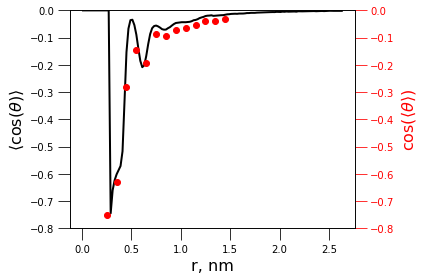

In [95]:
fig, ax0 = plt.subplots()
ax0.plot(r[:], data[:], lw = 2, c = 'k')
ax1 = ax0.twinx()
ax1.plot(r_hat, avg_theta_traj[2:], lw = 0, c = 'r', marker = 'o')
ax0.set_xlabel('r, nm', fontsize = 16)
ax0.tick_params(axis = 'both', size = 12)
ax0.set_ylabel(r'$\langle\cos\left(\theta\right)\rangle$', fontsize = 16)
ax0.set_ylim((-0.8,0))
ax1.tick_params(axis = 'y', size = 12, color = 'r', labelcolor = 'r')
ax1.set_ylabel(r'$\cos\left(\langle\theta\rangle\right)$', fontsize = 16, color = 'r')
ax1.set_ylim((-0.8,0))
#plt.xscale('log')
#plt.yscale('log')
#ax0.set_yscale('log')
#ax0.set_xscale('log')
#plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('compare_average_theta.png', dpi = 300)
plt.show()
plt.close()

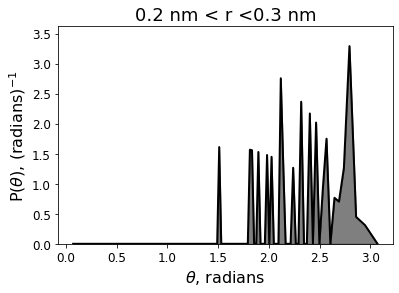

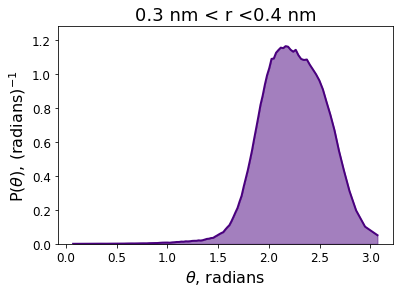

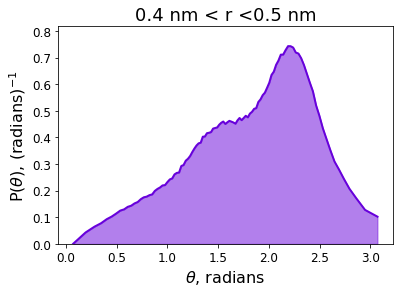

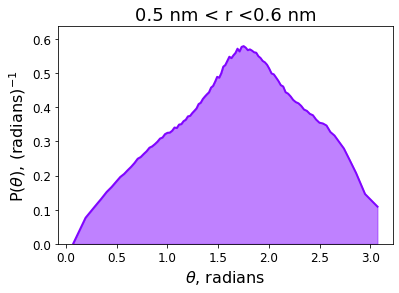

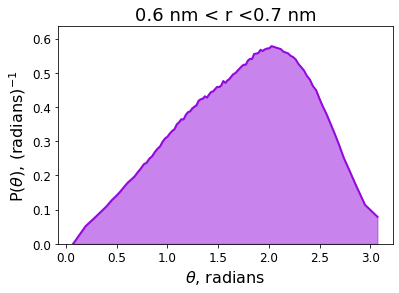

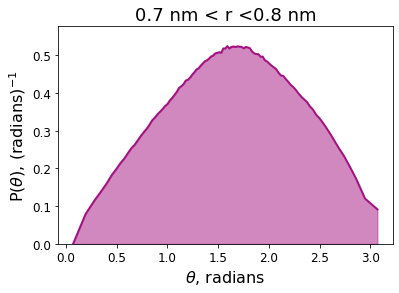

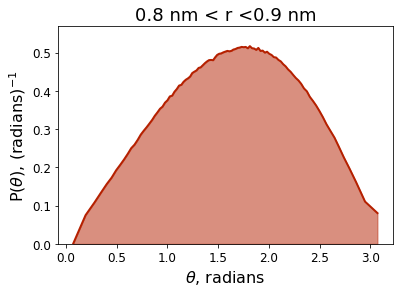

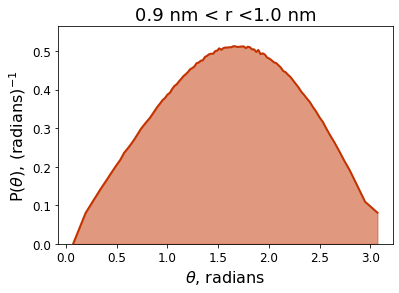

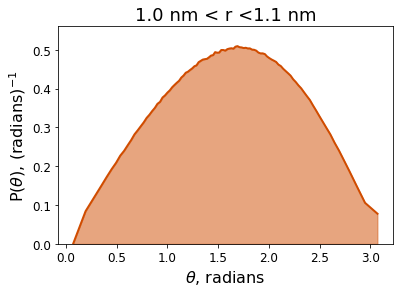

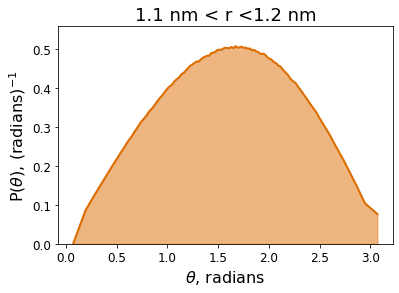

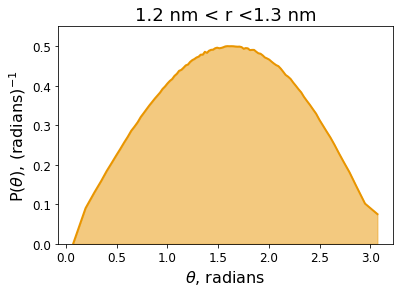

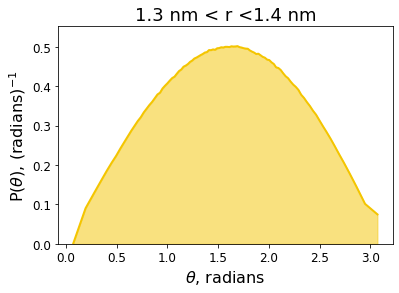

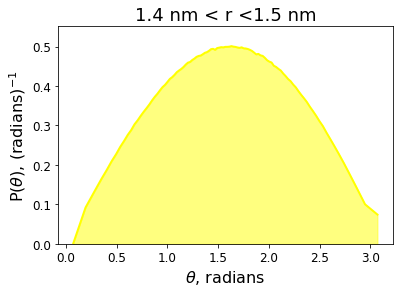

In [94]:
#Histograms of \theta
rmin = 0.2
rmax = 0.3
colors = plt.cm.gnuplot(np.linspace(0, 1, 13))
for counter, i in enumerate(range(2,15)):
    bins = []
    histo = []
    with open('sori'+str(i)+'.xvg', "r+") as f:
        for line in f:
            if line[0] == '@' or line[0] == '#' or line[0] == '&':
                pass
            else:
                dummy = line.split()
                bins.append(float(dummy[0]))
                histo.append(float(dummy[1]))
    bins = np.array(bins)
    histo = np.array(histo)
    #print(bins)
    #print('\n')
    #print(histo)
    
    #Convert bins from cos(\theta) to \theta
    #Leave off the last one because 1) there is no probability of observing the 
    #system there (the value of the histogram for that bin is 0) and 
    #2) arccos(1.01) is not defined (out of the domain of the arccos function/ range of the cosine function)
    theta_bins = np.arccos(bins[:-1])

    theta_bins = np.append(theta_bins,0)
    theta_bins = np.append(np.pi,theta_bins); #print(theta_bins); print(theta_bins.shape)
    
    #Use the bin widths, histogram, and theta values defined by each bin to get the average value of theta.
    avg_theta = 0
    thetas = (theta_bins[1:] + theta_bins[:-1]) / 2
    dtheta = theta_bins[:-1] - theta_bins[1:]

    #Renormalize the histogram
    histo = histo / (histo.sum()*dtheta)
    
    for j, ptheta in enumerate(histo):
        avg_theta += ptheta*dtheta[j]*thetas[j]
        
    plt.plot(thetas, histo, lw = 2, color = colors[counter])
    plt.fill_between(thetas, 0, histo, alpha = 0.5, color = colors[counter])
    plt.ylim((0, histo.max()*1.1))
    plt.xlabel(r'$\theta$, radians', fontsize = 16)
    plt.ylabel(r'P($\theta$), (radians)$^{-1}$', fontsize = 16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title(str(np.round(rmin, 1)) + ' nm < r <'+ str(np.round(rmax, 1)) +' nm', fontsize = 18)
    plt.show()
    plt.close()
    
    rmin += 0.1
    rmax += 0.1

In [82]:
histo

array([7.39758367e-02, 1.00135510e-01, 1.44633846e-01, 1.77195851e-01,
       2.04258745e-01, 2.27042935e-01, 2.47031257e-01, 2.65073664e-01,
       2.81604505e-01, 2.98267234e-01, 3.11077717e-01, 3.24626221e-01,
       3.36488401e-01, 3.47533838e-01, 3.59259433e-01, 3.68836559e-01,
       3.77599002e-01, 3.86833882e-01, 3.96573764e-01, 4.03654104e-01,
       4.12187182e-01, 4.17643749e-01, 4.25091691e-01, 4.31524249e-01,
       4.39148434e-01, 4.43311729e-01, 4.48204403e-01, 4.51280925e-01,
       4.59516103e-01, 4.61778332e-01, 4.65318599e-01, 4.71294577e-01,
       4.76263665e-01, 4.77591975e-01, 4.81323530e-01, 4.80001310e-01,
       4.84577844e-01, 4.88809456e-01, 4.91608562e-01, 4.93719828e-01,
       4.95022455e-01, 4.95399588e-01, 4.97981519e-01, 4.96532274e-01,
       4.97599320e-01, 4.98987540e-01, 4.99709686e-01, 5.00987340e-01,
       4.99586509e-01, 4.99167348e-01, 4.99107726e-01, 4.97828140e-01,
       4.98396482e-01, 4.97181773e-01, 4.96128762e-01, 4.91581479e-01,
      

In [96]:
from matplotlib.backends.backend_pdf import PdfPages

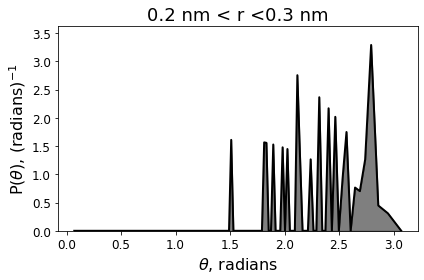

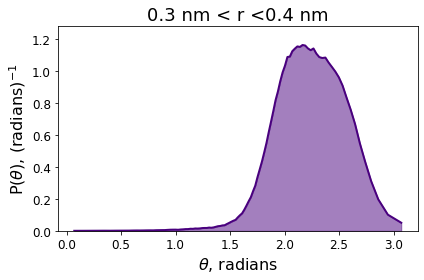

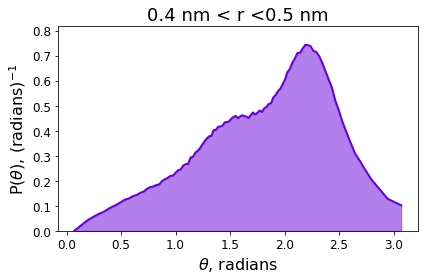

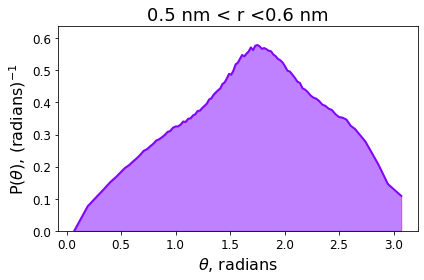

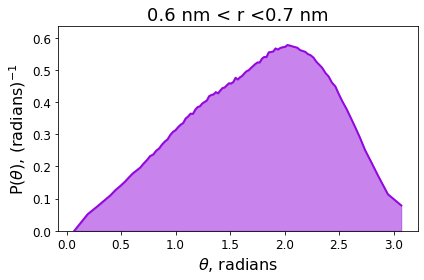

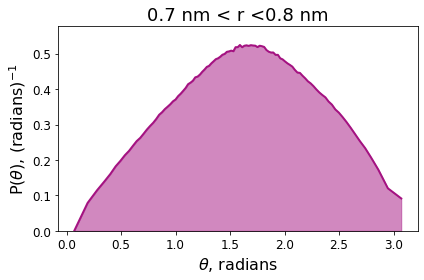

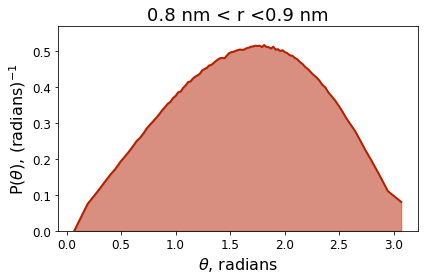

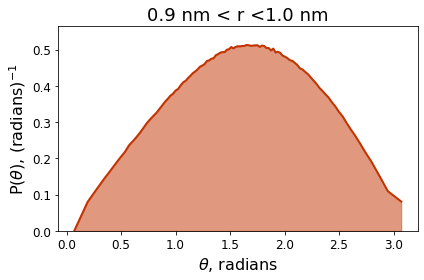

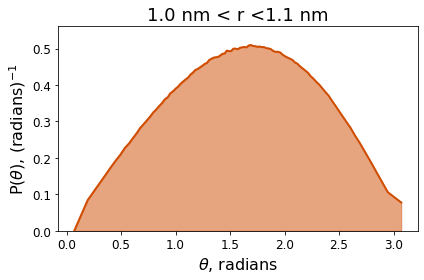

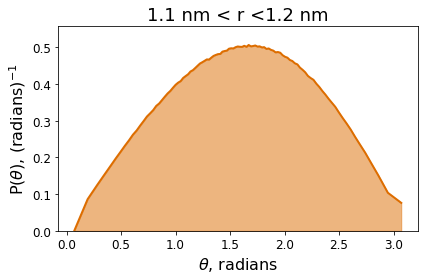

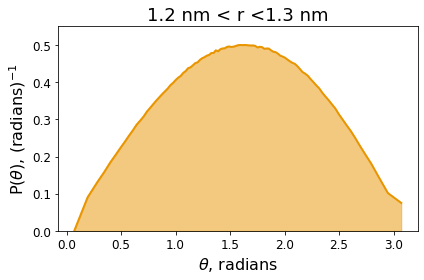

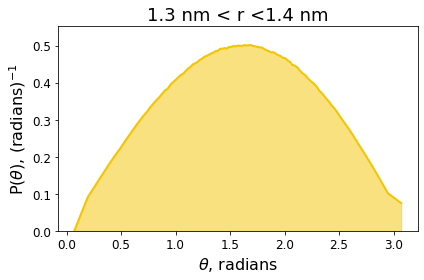

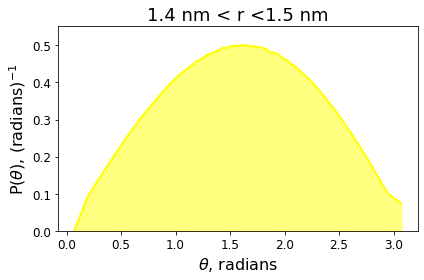

In [100]:
with PdfPages('theta_histograms.pdf') as pdf:
    #Histograms of \theta
    rmin = 0.2
    rmax = 0.3
    colors = plt.cm.gnuplot(np.linspace(0, 1, 13))
    for counter, i in enumerate(range(2,15)):
        bins = []
        histo = []
        with open('sori'+str(i)+'.xvg', "r+") as f:
            for line in f:
                if line[0] == '@' or line[0] == '#' or line[0] == '&':
                    pass
                else:
                    dummy = line.split()
                    bins.append(float(dummy[0]))
                    histo.append(float(dummy[1]))
        bins = np.array(bins)
        histo = np.array(histo)
        #print(bins)
        #print('\n')
        #print(histo)

        #Convert bins from cos(\theta) to \theta
        #Leave off the last one because 1) there is no probability of observing the 
        #system there (the value of the histogram for that bin is 0) and 
        #2) arccos(1.01) is not defined (out of the domain of the arccos function/ range of the cosine function)
        theta_bins = np.arccos(bins[:-1])

        theta_bins = np.append(theta_bins,0)
        theta_bins = np.append(np.pi,theta_bins); #print(theta_bins); print(theta_bins.shape)

        #Use the bin widths, histogram, and theta values defined by each bin to get the average value of theta.
        avg_theta = 0
        thetas = (theta_bins[1:] + theta_bins[:-1]) / 2
        dtheta = theta_bins[:-1] - theta_bins[1:]

        #Renormalize the histogram
        histo = histo / (histo.sum()*dtheta)

        for j, ptheta in enumerate(histo):
            avg_theta += ptheta*dtheta[j]*thetas[j]

        plt.plot(thetas, histo, lw = 2, color = colors[counter])
        plt.fill_between(thetas, 0, histo, alpha = 0.5, color = colors[counter])
        plt.ylim((0, histo.max()*1.1))
        plt.xlabel(r'$\theta$, radians', fontsize = 16)
        plt.ylabel(r'P($\theta$), (radians)$^{-1}$', fontsize = 16)
        plt.xticks(size = 12)
        plt.yticks(size = 12)
        plt.title(str(np.round(rmin, 1)) + ' nm < r <'+ str(np.round(rmax, 1)) +' nm', fontsize = 18)
        plt.tight_layout()
        pdf.savefig()
        plt.show()
        plt.close()

        rmin += 0.1
        rmax += 0.1